In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#支持中文
import matplotlib as mpl
from matplotlib.font_manager import _rebuild
_rebuild()
mpl.rcParams["font.sans-serif"] = [u"SimHei"]
mpl.rcParams["axes.unicode_minus"] = False

In [2]:
df = pd.read_csv('maotai2015.csv')
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-09-24,196.279999,192.800003,195.800003,194.000000,1388674.0,181.763428
1,2015-09-25,194.899994,189.500000,193.990005,193.460007,2445597.0,181.257492
2,2015-09-28,192.300003,189.229996,191.479996,191.380005,1234110.0,179.308670
3,2015-09-29,191.369995,188.300003,189.550003,190.169998,1840982.0,178.175003
4,2015-09-30,191.479996,190.169998,190.229996,190.309998,1163463.0,178.306168


In [3]:
count = int(np.ceil(len(df) * 0.1))
signals = pd.DataFrame(index=df.index)
signals['signal'] = 0.0
signals['trend'] = df['Adj Close']
signals['RollingMax'] = (signals.trend.shift(1).rolling(count).max())
signals['RollingMin'] = (signals.trend.shift(1).rolling(count).min())
signals.loc[signals['RollingMax'] < signals.trend, 'signal'] = -1
signals.loc[signals['RollingMin'] > signals.trend, 'signal'] = 1
signals

,signal,trend,RollingMax,RollingMin
0,0.0,181.763428,NaN,NaN
1,0.0,181.257492,NaN,NaN
2,0.0,179.308670,NaN,NaN
3,0.0,178.175003,NaN,NaN
4,0.0,178.306168,NaN,NaN
5,0.0,185.061417,NaN,NaN
6,0.0,184.527344,NaN,NaN
7,0.0,185.595459,NaN,NaN
8,0.0,186.204468,NaN,NaN
9,0.0,185.351868,NaN,NaN


In [4]:
def buy_stock(
    real_movement,
    signal,
    initial_money = 10000,
    max_buy = 1,
    max_sell = 1,
):
    """
    real_movement = 现实世界中的实际变化
    delay = 您希望延迟多少间隔以将我们的决定从买入变为卖出，反之亦然
    initial_state = 1是买，0是卖
    initial_money = 1000, 忽略什么样的货币
    max_buy = 要购买的股票的最大数量
    max_sell = 要出售的股票的最大数量
    """
    starting_money = initial_money
    states_sell = []
    states_buy = []
    current_inventory = 0

    def buy(i, initial_money, current_inventory):
        shares = initial_money // real_movement[i]
        if shares < 1:
            print(
                'day %d: total balances（总余额） %f, not enough money to buy a unit price（没有足够的钱买单价） %f'
                % (i, initial_money, real_movement[i])
            )
        else:
            if shares > max_buy:
                buy_units = max_buy
            else:
                buy_units = shares
            initial_money -= buy_units * real_movement[i]
            current_inventory += buy_units
            print(
                'day %d: buy %d units at price %f, total balance %f'
                % (i, buy_units, buy_units * real_movement[i], initial_money)
            )
            states_buy.append(0)
        return initial_money, current_inventory

    for i in range(real_movement.shape[0] - int(0.025 * len(df))):
        state = signal[i]
        if state == 1:
            initial_money, current_inventory = buy(
                i, initial_money, current_inventory
            )
            states_buy.append(i)
        elif state == -1:
            if current_inventory == 0:
                    print('day %d: cannot sell anything（不能卖）, inventory（库存） 0' % (i))
            else:
                if current_inventory > max_sell:
                    sell_units = max_sell
                else:
                    sell_units = current_inventory
                current_inventory -= sell_units
                total_sell = sell_units * real_movement[i]
                initial_money += total_sell
                try:
                    invest = (
                        (real_movement[i] - real_movement[states_buy[-1]])
                        / real_movement[states_buy[-1]]
                    ) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell（售卖） %d units at price（出售单价） %f, investment（投资） %f %%, total balance（总余额） %f,'
                    % (i, sell_units, total_sell, invest, initial_money)
                )
            states_sell.append(i)
            
    invest = ((initial_money - starting_money) / starting_money) * 100
    total_gains = initial_money - starting_money
    return states_buy, states_sell, total_gains, invest

In [5]:
states_buy, states_sell, total_gains, invest = buy_stock(df.Close, signals['signal'])

day 104: cannot sell anything（不能卖）, inventory（库存） 0
day 105: cannot sell anything（不能卖）, inventory（库存） 0
day 119: cannot sell anything（不能卖）, inventory（库存） 0
day 120: cannot sell anything（不能卖）, inventory（库存） 0
day 121: cannot sell anything（不能卖）, inventory（库存） 0
day 127: cannot sell anything（不能卖）, inventory（库存） 0
day 145: cannot sell anything（不能卖）, inventory（库存） 0
day 165: cannot sell anything（不能卖）, inventory（库存） 0
day 167: cannot sell anything（不能卖）, inventory（库存） 0
day 168: cannot sell anything（不能卖）, inventory（库存） 0
day 182: cannot sell anything（不能卖）, inventory（库存） 0
day 183: cannot sell anything（不能卖）, inventory（库存） 0
day 185: cannot sell anything（不能卖）, inventory（库存） 0
day 186: cannot sell anything（不能卖）, inventory（库存） 0
day 187: cannot sell anything（不能卖）, inventory（库存） 0
day 188: cannot sell anything（不能卖）, inventory（库存） 0
day 189: cannot sell anything（不能卖）, inventory（库存） 0
day 193: cannot sell anything（不能卖）, inventory（库存） 0
day 291: cannot sell anything（不能卖）, inventory（库存） 0
day 292: can

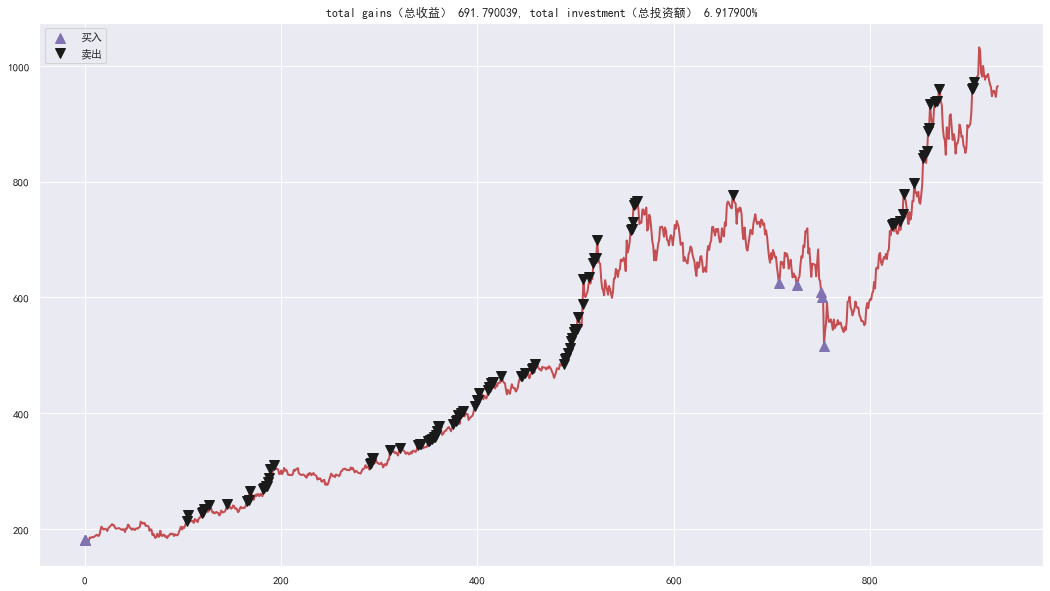

In [6]:
close = df['Adj Close']
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
fig = plt.figure(figsize = (18,10))
plt.plot(close, color='r', lw=2.)
plt.plot(close, '^', markersize=10, color='m', label = '买入', markevery = states_buy)
plt.plot(close, 'v', markersize=10, color='k', label = '卖出', markevery = states_sell)
plt.title('total gains（总收益） %f, total investment（总投资额） %f%%'%(total_gains, invest))
plt.legend()
plt.show()